# Labsheet: Topics 8-10

## Part 1: Linear Regression

In [3]:
graphics_toolkit ("gnuplot");

x = load('datasets/ex1x.dat'); # age
y = load('datasets/ex1y.dat'); # height

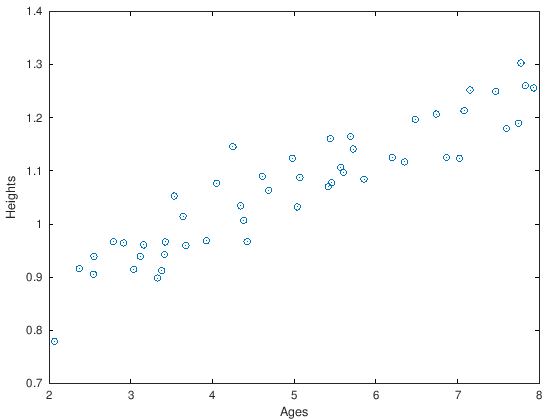

In [4]:
figure
plot (x, y, 'o');
ylabel ('Heights');
xlabel ('Ages');

In [5]:
m = length(y); % store the number of training examples
X = [ones(m, 1), x]; % Add a column of ones to x

In [6]:
theta = zeros(2, 1);
disp(theta)

   0
   0


In [7]:
iterations = 1500;
alpha = 0.07;

In [8]:
function J = computeCost(X, y, theta)
    m = length(y);

    J = 0;

    predictions = X*theta;
    sqrErrors   = (predictions - y).^2;

    J = 1/(2*m) * sum(sqrErrors);
end

## (a) Implement Gradient Descent

In [9]:
function [theta, J_history, iterationcount] = gradientDescent(X , y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    iterationcount=zeros(num_iters, 1);
    
    for iter = 1:num_iters
        x = X (:,2);
    
        h = theta(1) + (theta(2)*x);

        theta_zero = theta(1) - alpha * (1/m) * sum(h-y);
        theta_one  = theta(2) - alpha * (1/m) * sum((h - y) .* x);

        theta = [theta_zero; theta_one];
        J_history(iter)= computeCost(X, y, theta);
        iterationcount(iter)=iter;
    end
end

## (b) Continue running gradient descent for more iterations until θ converges

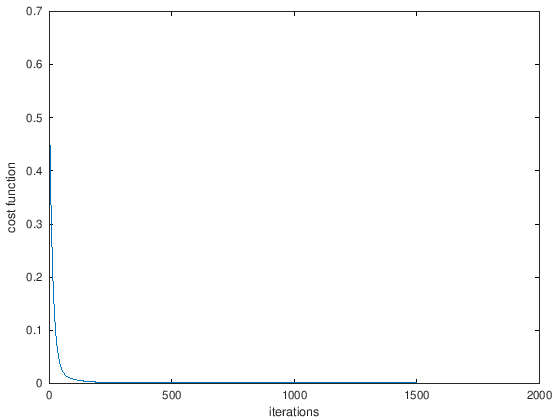

In [10]:
[theta, cost, count] = gradientDescent(X , y, theta, alpha, iterations);

figure;
plot(count, cost);
ylabel("cost function");
xlabel("iterations");

In [15]:
printf("theta 1: %i\n", theta(1));
printf("theta 2: %i\n", theta(2));

theta 1: 0.75015
theta 2: 0.0638834


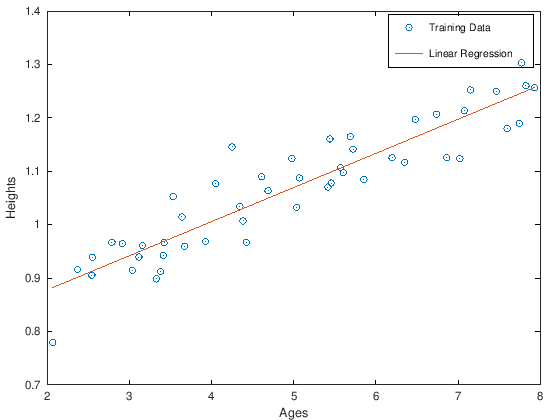

In [11]:
figure
plot(x, y, 'o');
ylabel('Heights');
xlabel('Ages');

hold on
plot(X(:, 2), X * theta, '-');
legend("Training Data", "Linear Regression");

## (c) Use the model to predict the height for two boys of aged 3.5 and 7.

`y = mx + c`

In [16]:
# when age = 3.5
age_1 = 3.5;
predicted_height_1 = (age_1 * theta(2)) + theta(1);

sprintf("Predicted Height for boy aged %i is %i", age_1, predicted_height_1)

ans = Predicted Height for boy aged 3.5 is 0.973742


In [17]:
# when age = 7.0
age_2 = 7.0;
predicted_height_2 = (age_2 * theta(2)) + theta(1);

sprintf("Predicted Height for boy aged %i is %i", age_2, predicted_height_2)

ans = Predicted Height for boy aged 7 is 1.19733


## Part 2: Understanding J(θ)

In [18]:
Jvals = zeros(100, 100); % initialize Jvals to 100_100 matrix of 0s

theta0vals = linspace (-3 , 3 , 100); 
theta1vals = linspace (-1 , 1 , 100 ); 

for i = 1 : length ( theta0vals )
    for j = 1 : length ( theta1vals )
        t = [ theta0vals(i); theta1vals(j)];
        Jvals ( i , j ) = computeCost(X, y, t);
    end 
end

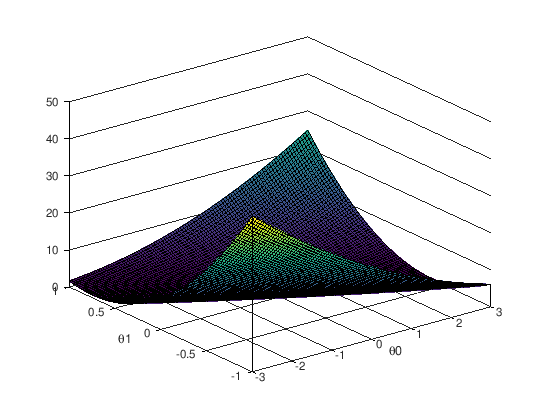

In [19]:
% Plot the surfaceplot
% Because of the way meshgrids work in the surf command, we 
% need to transpose Jvals before calling surf, or else the
% axes will be flipped

Jvals = Jvals';
figure;
surf (theta0vals, theta1vals, Jvals);
xlabel ('\theta0 ');
ylabel ( '\theta1 ');

### Question: What is the relationship between this 3D surface and the value of $\theta_0$ and $\theta_1$ that your implementation of gradient descent had found?



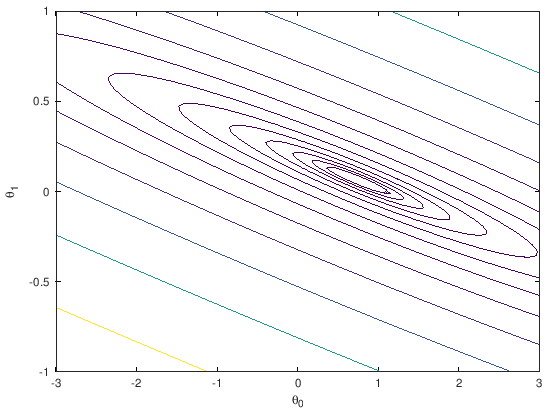

In [22]:
figure;

% Plot the cost function with 15 contours spaced logarithmically
% between 0.01 and 100
contour(theta0vals, theta1vals, Jvals, logspace(-2, 2, 15));
xlabel('\theta_0'); 
ylabel('\theta_1');

In [ ]:
# @Vidushi

# Regression Metrics 
#1.Mean Absolute Error (average of the absolute differences between predictions and actual values.) MAPE < 10% is Excellent, MAPE < 20% is Good) 

import numpy as np
from sklearn.model_selection import train_test_split 
import pandas as pd
salary = pd.read_csv("Salary.csv")

#Separating the dependent and independent data variables into two data frames.
X = salary.drop(['cnt'],axis=1) 
Y = salary['cnt']
 
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)
 
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#Building the Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train , Y_train)
 
#Predictions on Testing data
LR_Test_predict = linear_model.predict(X_test) 
 
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(Y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)




#2.Mean Squared Error.

# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


#3.R Squared (provides an indication of the goodness of fit of a set of predictions to the actual values.A value between 0 and 1 for no-fit and perfect fit respectively.)

# Cross Validation Regression R^2
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))
